# Stat Assignment 2
**member**
<ul>
 <li>Papan Choonhaklai 6210503691</li>
 <li>Jinnajate Achalapong 6210505163</li>
</ul> 

**Assignment information**
<ul>
 <li>ด้านการศาสนา วัฒนธรรมและนันนทาการ</li>
 <li>ศึกษาธิการ, สำนักนายกรัฐมนตรี, วัฒนธรรม</li>
</ul>



## Clustering Part

### Part1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df64 = pd.read_csv("assignment2_clustering_data.xlsx - 2564.csv")
df64

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7


In [ ]:
# sns.heatmap(df64.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df64.columns

Index(['กระทรวง-งบรายจ่าย', 'งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน',
       'งบเงินอุดหนุน', 'งบรายจ่ายอื่น', 'รวม'],
      dtype='object')

In [ ]:
df64[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น']].describe()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
count,20.000000,20.000000,20.000000,20.00000,20.000000
mean,27195.485000,6160.595000,19022.945000,27206.26000,19430.800000
std,54545.204505,6930.912416,41009.446754,58029.94422,56140.041536
min,822.000000,531.200000,375.700000,30.70000,79.800000
25%,2295.525000,1416.800000,820.500000,701.77500,709.800000
50%,6904.600000,2514.450000,3377.150000,1941.70000,1556.950000
75%,14581.200000,9455.200000,15075.950000,13447.32500,3102.775000
max,223199.600000,24102.900000,177009.100000,235503.60000,244863.500000


#### K-mean

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
df = df64[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น']]
df.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,3671.6,1375.7,375.7,63712.9,584.4
16,2321.9,1430.5,2325.4,1070.7,814.4
17,223199.6,20029.5,19437.0,88628.9,5154.7
18,107548.0,14411.4,17025.5,6637.5,179.9
19,1635.9,603.4,745.8,157.9,1516.2


In [ ]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


In [ ]:
!pip install yellowbrick

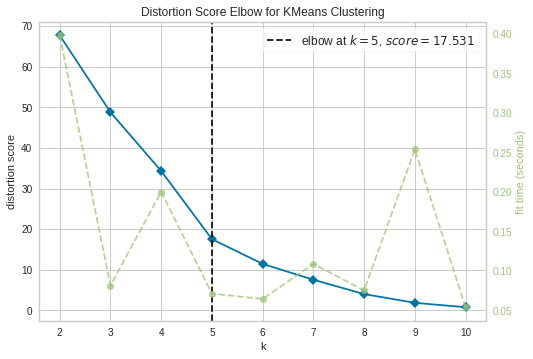

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans())
model.fit(df_normalized)
model.show()

Text(0, 0.5, 'SSE')

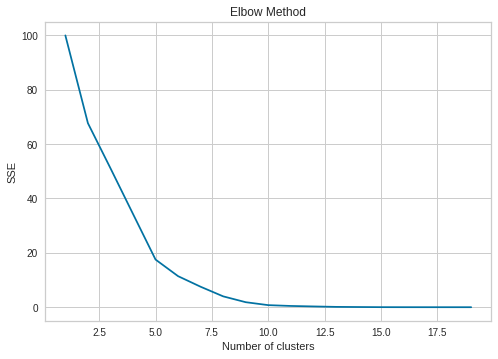

In [ ]:
max_k = 20
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [ ]:
# Choose value for k
k = 5

In [ ]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=5)

In [ ]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df.tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
10,10992.6,5199.8,10408.8,1103.6,1630.9,1
11,822.0,531.2,707.8,30.7,187.5,1
12,2216.4,1585.4,845.4,479.5,1698.8,1
13,19360.2,12718.1,38441.4,235503.6,28464.4,4
14,10363.6,8775.0,3333.1,1937.6,2418.8,1
15,3671.6,1375.7,375.7,63712.9,584.4,1
16,2321.9,1430.5,2325.4,1070.7,814.4,1
17,223199.6,20029.5,19437.0,88628.9,5154.7,2
18,107548.0,14411.4,17025.5,6637.5,179.9,2
19,1635.9,603.4,745.8,157.9,1516.2,1


In [ ]:
tmp = df64
tmp['cluster_id'] = cluster_predictions
tmp

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9,1
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6,2
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2,3
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4,1
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7,1
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8,1
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0,1
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1,0
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7,0
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7,1


In [ ]:
tmp[tmp.cluster_id == 0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1,0
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7,0


In [ ]:
tmp[tmp.cluster_id == 1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9,1
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4,1
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7,1
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8,1
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0,1
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7,1
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10992.6,5199.8,10408.8,1103.6,1630.9,29335.7,1
11,กระทรวงพลังงาน,822.0,531.2,707.8,30.7,187.5,2279.2,1
12,กระทรวงพาณิชย์,2216.4,1585.4,845.4,479.5,1698.8,6825.5,1
14,กระทรวงยุติธรรม,10363.6,8775.0,3333.1,1937.6,2418.8,26828.1,1


In [ ]:
tmp[tmp.cluster_id == 2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6,2
17,กระทรวงศึกษาธิการ,223199.6,20029.5,19437.0,88628.9,5154.7,356449.7,2
18,กระทรวงสาธารณสุข,107548.0,14411.4,17025.5,6637.5,179.9,145802.3,2


In [ ]:
tmp[tmp.cluster_id == 3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2,3


In [ ]:
tmp[tmp.cluster_id == 4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
13,กระทรวงมหาดไทย,19360.2,12718.1,38441.4,235503.6,28464.4,334487.7,4


In [ ]:
df.cluster_id.value_counts()

1    13
2     3
0     2
3     1
4     1
Name: cluster_id, dtype: int64

In [ ]:
# The best value is 1 and the worst value is -1

print(metrics.silhouette_score(df,kmeans.labels_))

0.517247696139594


In [ ]:
# The minimum score is zero, with lower values indicating better clustering.

print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.5723699449576267


In [ ]:
df.groupby('cluster_id').mean()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
cluster_id,,,,,
0,17040.650000,6966.000000,124650.950000,1029.100000,658.200000
1,4285.000000,2419.238462,2954.292308,15838.707692,2189.023077
2,140591.666667,19514.600000,16962.866667,33353.600000,28504.800000
3,12988.200000,6567.900000,3421.200000,599.400000,244863.500000
4,19360.200000,12718.100000,38441.400000,235503.600000,28464.400000


#### Hierarchical Clustering

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics

In [ ]:
df = df64[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น']]
df.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,3671.6,1375.7,375.7,63712.9,584.4
16,2321.9,1430.5,2325.4,1070.7,814.4
17,223199.6,20029.5,19437.0,88628.9,5154.7
18,107548.0,14411.4,17025.5,6637.5,179.9
19,1635.9,603.4,745.8,157.9,1516.2


In [ ]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


In [ ]:
# Set up parameter values
linkage_val = 'average'  # 'others are 'complete', 'single', 'ward'
dist_threshold_val = 0   # Set to be zero to plot dendrogram
nclusters_val = None     # if distance_threshold is 0, this must be None

In [ ]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(df_normalized)
model

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

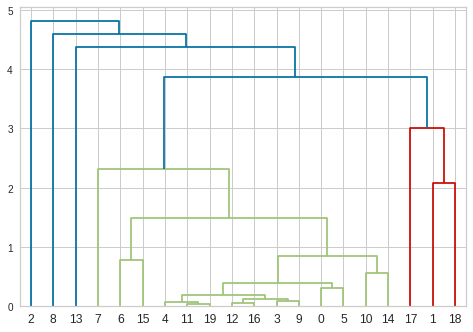

In [ ]:
plot_dendrogram(model, truncate_mode='level', p=10)

In [ ]:
# Choose the distance threshold from dendrogram
dist_threshold_val = 3
nclusters_val = None

In [ ]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(df_normalized)
model

AgglomerativeClustering(distance_threshold=3, linkage='average',
                        n_clusters=None)

In [ ]:
labels = model.labels_
labels

array([0, 1, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0, 0, 0, 2, 1, 0])

In [ ]:
cluster_predictions = model.fit_predict(df_normalized)
df['cluster_id'] = cluster_predictions
df.tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
10,10992.6,5199.8,10408.8,1103.6,1630.9,0
11,822.0,531.2,707.8,30.7,187.5,0
12,2216.4,1585.4,845.4,479.5,1698.8,0
13,19360.2,12718.1,38441.4,235503.6,28464.4,4
14,10363.6,8775.0,3333.1,1937.6,2418.8,0
15,3671.6,1375.7,375.7,63712.9,584.4,0
16,2321.9,1430.5,2325.4,1070.7,814.4,0
17,223199.6,20029.5,19437.0,88628.9,5154.7,2
18,107548.0,14411.4,17025.5,6637.5,179.9,1
19,1635.9,603.4,745.8,157.9,1516.2,0


In [ ]:
# The best value is 1 and the worst value is -1
# dist_threshold_val = 3 0.5043462069124952
# dist_threshold_val = 4 0.47944999785020775
print(metrics.silhouette_score(df,labels))

0.5043462069124952


In [ ]:
# The minimum score is zero, with lower values indicating better clustering.
# dist_threshold_val = 3 0.35913503244067746
# dist_threshold_val = 4 0.2841988576122862
print(metrics.davies_bouldin_score(df,model.labels_))

0.35913503244067746


In [ ]:
df.cluster_id.value_counts()

0    14
1     2
3     1
5     1
4     1
2     1
Name: cluster_id, dtype: int64

In [ ]:
tmp = df64
tmp['cluster_id'] = cluster_predictions
tmp

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9,0
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6,1
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2,3
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4,0
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8,0
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0,0
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1,0
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7,5
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7,0


In [ ]:
tmp[tmp.cluster_id == 0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9,0
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4,0
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8,0
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0,0
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1,0
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7,0
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10992.6,5199.8,10408.8,1103.6,1630.9,29335.7,0
11,กระทรวงพลังงาน,822.0,531.2,707.8,30.7,187.5,2279.2,0
12,กระทรวงพาณิชย์,2216.4,1585.4,845.4,479.5,1698.8,6825.5,0


In [ ]:
tmp[tmp.cluster_id == 1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6,1
18,กระทรวงสาธารณสุข,107548.0,14411.4,17025.5,6637.5,179.9,145802.3,1


In [ ]:
tmp[tmp.cluster_id == 2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
17,กระทรวงศึกษาธิการ,223199.6,20029.5,19437.0,88628.9,5154.7,356449.7,2


In [ ]:
tmp[tmp.cluster_id == 3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2,3


In [ ]:
tmp[tmp.cluster_id == 4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
13,กระทรวงมหาดไทย,19360.2,12718.1,38441.4,235503.6,28464.4,334487.7,4


In [ ]:
tmp[tmp.cluster_id == 5]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7,5


In [ ]:
df.groupby('cluster_id').mean()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
cluster_id,,,,,
0,5720.114286,3067.564286,7907.042857,14850.307143,2073.007143
1,99287.700000,19257.150000,15725.800000,5715.950000,40179.850000
2,223199.600000,20029.500000,19437.000000,88628.900000,5154.700000
3,12988.200000,6567.900000,3421.200000,599.400000,244863.500000
4,19360.200000,12718.100000,38441.400000,235503.600000,28464.400000
5,9704.700000,2436.200000,177009.100000,57.100000,751.600000


#### DBSCAN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
df = df64[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น']]
df.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,3671.6,1375.7,375.7,63712.9,584.4
16,2321.9,1430.5,2325.4,1070.7,814.4
17,223199.6,20029.5,19437.0,88628.9,5154.7
18,107548.0,14411.4,17025.5,6637.5,179.9
19,1635.9,603.4,745.8,157.9,1516.2


In [ ]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


In [ ]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbor_model = neighbors.fit(df_normalized)
distances, indices = neighbor_model.kneighbors(df_normalized)
distances

array([[0.        , 0.30742844],
       [0.        , 2.07304746],
       [0.        , 4.24636778],
       [0.        , 0.08261737],
       [0.        , 0.04861594],
       [0.        , 0.27040136],
       [0.        , 0.77417461],
       [0.        , 1.79144992],
       [0.        , 2.95621947],
       [0.        , 0.07079815],
       [0.        , 0.46343997],
       [0.        , 0.0307278 ],
       [0.        , 0.04765692],
       [0.        , 3.03086549],
       [0.        , 0.55856078],
       [0.        , 0.77417461],
       [0.        , 0.04765692],
       [0.        , 2.74539142],
       [0.        , 2.04051061],
       [0.        , 0.0307278 ]])

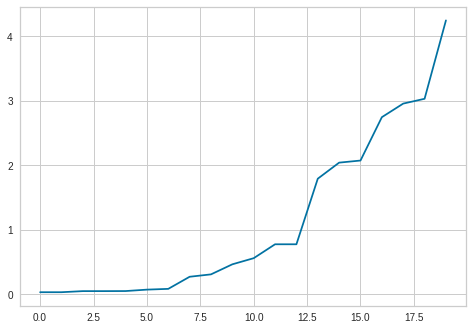

In [ ]:
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])

In [ ]:
# Choose value for eps and min_samples
# choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

eps_value = 2.1
min_sample_value = 10

In [ ]:
dbscan=DBSCAN(eps=eps_value,min_samples=min_sample_value)
model=dbscan.fit(df_normalized)

In [ ]:
labels = model.labels_
labels

array([ 0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
       -1,  0,  0])

In [ ]:
cluster_ids = pd.Series(labels).unique()
cluster_ids 

array([ 0, -1])

In [ ]:
n_clusters=len(cluster_ids)-1   # -1 = noise
n_clusters

1

In [ ]:
cluster_predictions = dbscan.fit_predict(df_normalized)
df['cluster_id'] = cluster_predictions
df.tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
10,10992.6,5199.8,10408.8,1103.6,1630.9,0
11,822.0,531.2,707.8,30.7,187.5,0
12,2216.4,1585.4,845.4,479.5,1698.8,0
13,19360.2,12718.1,38441.4,235503.6,28464.4,-1
14,10363.6,8775.0,3333.1,1937.6,2418.8,0
15,3671.6,1375.7,375.7,63712.9,584.4,0
16,2321.9,1430.5,2325.4,1070.7,814.4,0
17,223199.6,20029.5,19437.0,88628.9,5154.7,-1
18,107548.0,14411.4,17025.5,6637.5,179.9,0
19,1635.9,603.4,745.8,157.9,1516.2,0


In [ ]:
# The best value is 1 and the worst value is -1
print(metrics.silhouette_score(df,labels))

0.5111494849290473


In [ ]:
# The minimum score is zero, with lower values indicating better clustering.
print(metrics.davies_bouldin_score(df,model.labels_))

1.6989264888916087


In [ ]:
df.cluster_id.value_counts()

 0    15
-1     5
Name: cluster_id, dtype: int64

In [ ]:
tmp = df64
tmp['cluster_id'] = cluster_predictions
tmp

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9,0
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6,-1
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2,-1
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4,0
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8,0
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0,0
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1,0
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7,-1
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7,0


In [ ]:
tmp[tmp.cluster_id == 0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9,0
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4,0
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8,0
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0,0
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1,0
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7,0
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10992.6,5199.8,10408.8,1103.6,1630.9,29335.7,0
11,กระทรวงพลังงาน,822.0,531.2,707.8,30.7,187.5,2279.2,0
12,กระทรวงพาณิชย์,2216.4,1585.4,845.4,479.5,1698.8,6825.5,0


In [ ]:
tmp[tmp.cluster_id == -1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6,-1
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2,-1
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7,-1
13,กระทรวงมหาดไทย,19360.2,12718.1,38441.4,235503.6,28464.4,334487.7,-1
17,กระทรวงศึกษาธิการ,223199.6,20029.5,19437.0,88628.9,5154.7,356449.7,-1


In [ ]:
df.groupby('cluster_id').mean()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
cluster_id,,,,,
-1,71256.02,13170.92,50546.96,65916.680000,71882.8
0,12508.64,3823.82,8514.94,14302.786667,1946.8


### Part2

#### K-mean: Year60

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
df60 = pd.read_csv("assignment2_clustering_data.xlsx - 2560.csv")
df60

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,3894.0,2853.3,4777.3,9458.4,14429.3,35412.3
1,กระทรวงกลาโหม,90837.3,25772.7,8398.4,3536.4,84905.1,213449.9
2,กระทรวงการคลัง,12014.6,6188.9,3343.7,238.8,195927.6,217713.6
3,กระทรวงการต่างประเทศ,2997.4,2590.2,604.2,1147.2,1370.6,8709.6
4,กระทรวงการท่องเที่ยวและกีฬา,1424.4,1113.7,1658.1,405.3,1946.9,6548.4
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2667.9,3401.0,952.7,4419.3,219.1,11660.0
6,กระทรวงเกษตรเเละสหกรณ์,25027.8,14022.7,46346.7,1952.3,917.9,88267.4
7,กระทรวงคมนาคม,9248.9,2344.5,137892.7,462.3,801.6,150750.0
8,ระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10468.6,6712.3,12880.3,2224.8,1435.0,33721.0
9,ระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร,1164.5,809.1,978.4,2263.6,2468.6,7684.2


In [ ]:
df = df60[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น']]
df.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,2131.1,775.0,1816.6,1495.5,1168.7
16,402.3,338.4,620.9,8922.8,1218.4
17,258020.8,36824.8,33810.3,175509.7,9244.4
18,89008.3,14573.1,20126.3,6793.7,262.9
19,1622.3,638.9,586.5,575.7,2243.4


In [ ]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.395078,-0.470021,-0.344301,-0.251257,-0.069280
1,1.080991,1.981045,-0.227101,-0.344663,1.496412
2,-0.257211,-0.113303,-0.390701,-0.396675,3.962891
3,-0.410300,-0.498158,-0.479367,-0.382347,-0.359393
4,-0.437005,-0.656059,-0.445257,-0.394049,-0.346590


In [ ]:
# !pip install yellowbrick

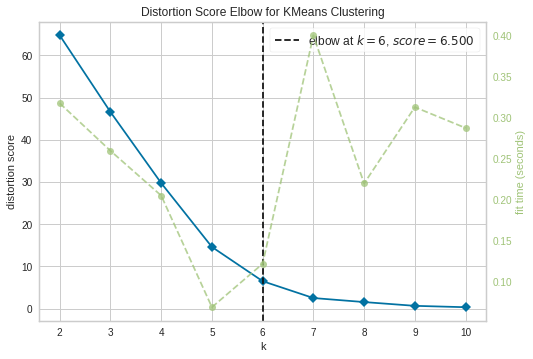

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans())
model.fit(df_normalized)
model.show()

Text(0, 0.5, 'SSE')

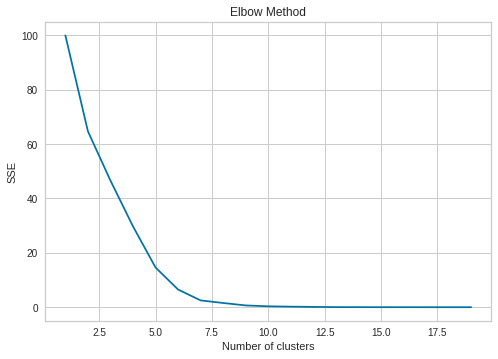

In [ ]:
max_k = 20
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [ ]:
# Choose value for k
k = 6

In [ ]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [ ]:
cluster_predictions = kmeans.predict(df_normalized)
df60['cluster_id'] = cluster_predictions
df60

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,3894.0,2853.3,4777.3,9458.4,14429.3,35412.3,0
1,กระทรวงกลาโหม,90837.3,25772.7,8398.4,3536.4,84905.1,213449.9,5
2,กระทรวงการคลัง,12014.6,6188.9,3343.7,238.8,195927.6,217713.6,2
3,กระทรวงการต่างประเทศ,2997.4,2590.2,604.2,1147.2,1370.6,8709.6,0
4,กระทรวงการท่องเที่ยวและกีฬา,1424.4,1113.7,1658.1,405.3,1946.9,6548.4,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2667.9,3401.0,952.7,4419.3,219.1,11660.0,0
6,กระทรวงเกษตรเเละสหกรณ์,25027.8,14022.7,46346.7,1952.3,917.9,88267.4,5
7,กระทรวงคมนาคม,9248.9,2344.5,137892.7,462.3,801.6,150750.0,3
8,ระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10468.6,6712.3,12880.3,2224.8,1435.0,33721.0,0
9,ระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร,1164.5,809.1,978.4,2263.6,2468.6,7684.2,0


กระทรวงศึกษาธิการ cluster_id = 1  
สำนักนายกรัฐมนตรี cluster_id = 0

In [ ]:
df60.cluster_id.value_counts()

0    13
5     3
2     1
3     1
4     1
1     1
Name: cluster_id, dtype: int64

In [ ]:
# The best value is 1 and the worst value is -1

print(metrics.silhouette_score(df,kmeans.labels_))

0.5461734952884353


In [ ]:
# The minimum score is zero, with lower values indicating better clustering.

print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.4504695577912754


In [ ]:
df60[df60.cluster_id == 0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,3894.0,2853.3,4777.3,9458.4,14429.3,35412.3,0
3,กระทรวงการต่างประเทศ,2997.4,2590.2,604.2,1147.2,1370.6,8709.6,0
4,กระทรวงการท่องเที่ยวและกีฬา,1424.4,1113.7,1658.1,405.3,1946.9,6548.4,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2667.9,3401.0,952.7,4419.3,219.1,11660.0,0
8,ระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10468.6,6712.3,12880.3,2224.8,1435.0,33721.0,0
9,ระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร,1164.5,809.1,978.4,2263.6,2468.6,7684.2,0
10,กระทรวงพลังงาน,783.7,542.2,451.3,24.7,251.1,2053.0,0
11,กระทรวงพาณิชย์,2215.6,1969.0,411.8,623.0,1815.3,7034.7,0
13,กระทรวงยุติธรรม,8618.7,8988.1,3128.0,931.0,1885.0,23550.8,0
14,กระทรวงเเรงงาน,3454.8,1700.3,461.9,40695.9,878.0,47190.9,0


In [ ]:
df60[df60.cluster_id == 1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
17,กระทรวงศึกษาธิการ,258020.8,36824.8,33810.3,175509.7,9244.4,513410.0,1


In [ ]:
df60[df60.cluster_id == 2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
2,กระทรวงการคลัง,12014.6,6188.9,3343.7,238.8,195927.6,217713.6,2


In [ ]:
df60[df60.cluster_id == 3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
7,กระทรวงคมนาคม,9248.9,2344.5,137892.7,462.3,801.6,150750.0,3


In [ ]:
df60[df60.cluster_id == 4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
12,กระทรวงมหาดไทย,17293.9,12809.2,29055.5,246083.2,27566.7,332808.5,4


In [ ]:
df60[df60.cluster_id == 5]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
1,กระทรวงกลาโหม,90837.3,25772.7,8398.4,3536.4,84905.1,213449.9,5
6,กระทรวงเกษตรเเละสหกรณ์,25027.8,14022.7,46346.7,1952.3,917.9,88267.4,5
18,กระทรวงสาธารณสุข,89008.3,14573.1,20126.3,6793.7,262.9,130764.3,5


In [ ]:
df = df60[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น', 'cluster_id']]
df.groupby('cluster_id').mean()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
cluster_id,,,,,
0,3218.869231,2494.730769,2256.000000,5629.784615,2409.953846
1,258020.800000,36824.800000,33810.300000,175509.700000,9244.400000
2,12014.600000,6188.900000,3343.700000,238.800000,195927.600000
3,9248.900000,2344.500000,137892.700000,462.300000,801.600000
4,17293.900000,12809.200000,29055.500000,246083.200000,27566.700000
5,68291.133333,18122.833333,24957.133333,4094.133333,28695.300000


#### K-mean: Year61

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
df61 = pd.read_csv("assignment2_clustering_data.xlsx - 2561.csv")
df61

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,3941.3,2770.8,3682.2,9474.7,14005.7,33874.7
1,กระทรวงกลาโหม,91153.1,25039.5,9544.1,6610.7,88176.3,220523.7
2,กระทรวงการคลัง,12235.8,6177.6,3177.1,89.2,216561.9,238241.6
3,กระทรวงการต่างประเทศ,3045.3,2534.2,574.0,1182.7,1425.3,8761.5
4,กระทรวงการท่องเที่ยวและกีฬา,1342.8,1107.3,1911.2,340.1,1921.5,6622.9
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2652.9,3542.9,1383.2,5951.5,187.0,13717.5
6,กระทรวงเกษตรและสหกรณ์,25019.6,15538.5,55276.8,3139.3,856.5,99830.7
7,กระทรวงคมนาคม,9492.6,2308.9,156059.3,268.4,638.8,168768.0
8,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1163.7,1163.4,1379.2,2587.1,277.8,6571.2
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10632.0,6284.7,12447.3,2493.2,1787.5,33644.7


In [ ]:
df = df61[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น']]
df.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,2115.6,733.9,2733.9,1338.6,1180.3
16,406.6,337.8,682.5,12124.0,724.5
17,250754.5,33148.8,34287.6,180797.9,8958.9
18,91525.1,14110.2,22035.6,6978.5,244.6
19,1586.3,609.1,800.8,516.3,1735.7


In [ ]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.400287,-0.491456,-0.382696,-0.263163,-0.093725
1,1.113194,2.038018,-0.214987,-0.305846,1.407207
2,-0.256344,-0.104482,-0.397147,-0.403037,4.005245
3,-0.415836,-0.518331,-0.471622,-0.386741,-0.348305
4,-0.445382,-0.680411,-0.433365,-0.399298,-0.338263


In [ ]:
# !pip install yellowbrick

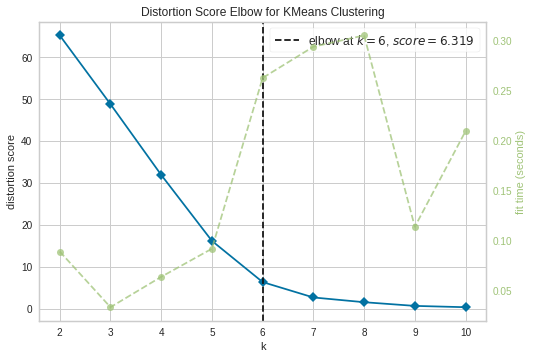

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans())
model.fit(df_normalized)
model.show()

Text(0, 0.5, 'SSE')

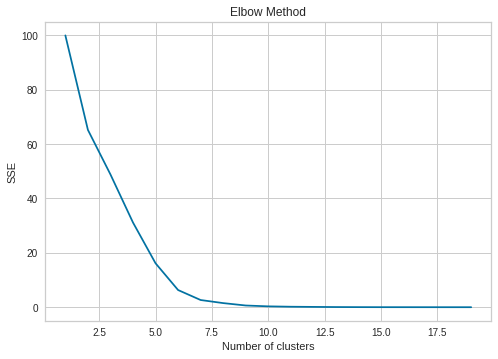

In [ ]:
max_k = 20
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [ ]:
# Choose value for k
k = 6

In [ ]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [ ]:
cluster_predictions = kmeans.predict(df_normalized)
df61['cluster_id'] = cluster_predictions
df61

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,3941.3,2770.8,3682.2,9474.7,14005.7,33874.7,2
1,กระทรวงกลาโหม,91153.1,25039.5,9544.1,6610.7,88176.3,220523.7,0
2,กระทรวงการคลัง,12235.8,6177.6,3177.1,89.2,216561.9,238241.6,3
3,กระทรวงการต่างประเทศ,3045.3,2534.2,574.0,1182.7,1425.3,8761.5,2
4,กระทรวงการท่องเที่ยวและกีฬา,1342.8,1107.3,1911.2,340.1,1921.5,6622.9,2
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2652.9,3542.9,1383.2,5951.5,187.0,13717.5,2
6,กระทรวงเกษตรและสหกรณ์,25019.6,15538.5,55276.8,3139.3,856.5,99830.7,0
7,กระทรวงคมนาคม,9492.6,2308.9,156059.3,268.4,638.8,168768.0,1
8,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1163.7,1163.4,1379.2,2587.1,277.8,6571.2,2
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10632.0,6284.7,12447.3,2493.2,1787.5,33644.7,2


กระทรวงศึกษาธิการ cluster_id = 5  
สำนักนายกรัฐมนตรี cluster_id = 2

In [ ]:
df61.cluster_id.value_counts()

2    13
0     3
3     1
1     1
4     1
5     1
Name: cluster_id, dtype: int64

In [ ]:
# The best value is 1 and the worst value is -1

print(metrics.silhouette_score(df,kmeans.labels_))

0.5473029134015734


In [ ]:
# The minimum score is zero, with lower values indicating better clustering.

print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.45123286083644226


In [ ]:
df61[df61.cluster_id == 0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
1,กระทรวงกลาโหม,91153.1,25039.5,9544.1,6610.7,88176.3,220523.7,0
6,กระทรวงเกษตรและสหกรณ์,25019.6,15538.5,55276.8,3139.3,856.5,99830.7,0
18,กระทรวงสาธารณสุข,91525.1,14110.2,22035.6,6978.5,244.6,134894.0,0


In [ ]:
df61[df61.cluster_id == 1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
7,กระทรวงคมนาคม,9492.6,2308.9,156059.3,268.4,638.8,168768.0,1


In [ ]:
df61[df61.cluster_id == 2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,3941.3,2770.8,3682.2,9474.7,14005.7,33874.7,2
3,กระทรวงการต่างประเทศ,3045.3,2534.2,574.0,1182.7,1425.3,8761.5,2
4,กระทรวงการท่องเที่ยวและกีฬา,1342.8,1107.3,1911.2,340.1,1921.5,6622.9,2
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2652.9,3542.9,1383.2,5951.5,187.0,13717.5,2
8,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1163.7,1163.4,1379.2,2587.1,277.8,6571.2,2
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10632.0,6284.7,12447.3,2493.2,1787.5,33644.7,2
10,กระทรวงพลังงาน,785.1,542.7,544.0,24.5,324.8,2221.1,2
11,กระทรวงพาณิชย์,2208.7,1716.8,396.2,637.0,2115.0,7073.7,2
13,กระทรวงยุติธรรม,8775.7,8648.1,4094.6,1014.6,1947.8,24480.8,2
14,กระทรวงแรงงาน,3491.5,1582.6,511.9,42776.4,1197.3,49559.7,2


In [ ]:
df61[df61.cluster_id == 3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
2,กระทรวงการคลัง,12235.8,6177.6,3177.1,89.2,216561.9,238241.6,3


In [ ]:
df61[df61.cluster_id == 4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
12,กระทรวงมหาดไทย,17815.0,14050.7,29648.7,264311.4,28477.8,354303.6,4


In [ ]:
df61[df61.cluster_id == 5]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
17,กระทรวงศึกษาธิการ,250754.5,33148.8,34287.6,180797.9,8958.9,507947.7,5


In [ ]:
df = df61[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น', 'cluster_id']]
df.groupby('cluster_id').mean()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
cluster_id,,,,,
0,69232.600000,18229.400000,28952.166667,5576.166667,29759.133333
1,9492.600000,2308.900000,156059.300000,268.400000,638.800000
2,3242.115385,2428.792308,2395.461538,6189.284615,2217.707692
3,12235.800000,6177.600000,3177.100000,89.200000,216561.900000
4,17815.000000,14050.700000,29648.700000,264311.400000,28477.800000
5,250754.500000,33148.800000,34287.600000,180797.900000,8958.900000


#### K-mean: Year62

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
df62 = pd.read_csv("assignment2_clustering_data.xlsx - 2562.csv")
df62

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,3954.7,2962.6,6772.5,11813.6,15327.0,40830.4
1,กระทรวงกลาโหม,93590.8,24735.3,11188.3,5377.5,92234.7,227126.6
2,กระทรวงการคลัง,12679.7,6433.3,3326.1,753.0,219755.9,242948.0
3,กระทรวงการต่างประเทศ,2951.1,2577.8,419.5,1409.3,1839.6,9197.3
4,กระทรวงการท่องเที่ยวและกีฬา,1509.6,1111.2,1441.6,369.5,1643.1,6075.0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2741.8,2998.5,915.5,6510.5,176.3,13342.6
6,กระทรวงเกษตรและสหกรณ์,24739.8,14596.1,65676.5,2979.3,1005.2,108996.9
7,กระทรวงคมนาคม,9472.2,2468.7,166867.5,45.9,744.3,179598.6
8,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1233.6,896.1,1243.2,1773.2,267.3,5413.4
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10875.0,6189.6,11026.6,948.3,1653.1,30692.6


In [ ]:
df = df62[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น']]
df.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,2131.6,736.4,2628.9,1382.8,1235.6
16,415.0,324.5,781.1,12947.3,259.7
17,237718.1,28233.1,32548.7,179311.0,9835.5
18,95815.7,14808.5,17895.0,6653.7,215.8
19,1620.3,620.3,642.3,378.0,1970.3


In [ ]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.412334,-0.478227,-0.297626,-0.232150,-0.074798
1,1.203523,2.213682,-0.180440,-0.324660,1.453035
2,-0.255050,-0.049120,-0.389086,-0.391131,3.986346
3,-0.430426,-0.525802,-0.466221,-0.381698,-0.342736
4,-0.456412,-0.707128,-0.439097,-0.396644,-0.346640


In [ ]:
# !pip install yellowbrick

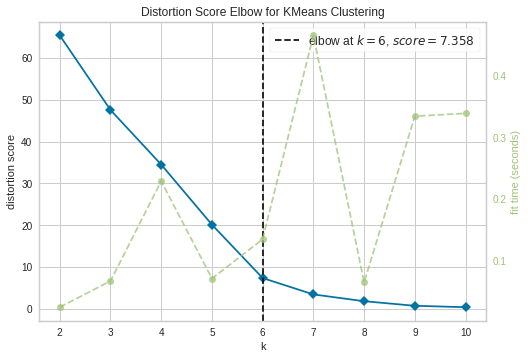

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans())
model.fit(df_normalized)
model.show()

Text(0, 0.5, 'SSE')

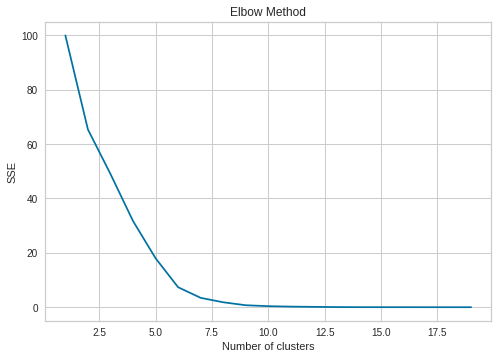

In [ ]:
max_k = 20
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [ ]:
# Choose value for k
k = 6

In [ ]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [ ]:
cluster_predictions = kmeans.predict(df_normalized)
df62['cluster_id'] = cluster_predictions
df62

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,3954.7,2962.6,6772.5,11813.6,15327.0,40830.4,0
1,กระทรวงกลาโหม,93590.8,24735.3,11188.3,5377.5,92234.7,227126.6,1
2,กระทรวงการคลัง,12679.7,6433.3,3326.1,753.0,219755.9,242948.0,3
3,กระทรวงการต่างประเทศ,2951.1,2577.8,419.5,1409.3,1839.6,9197.3,0
4,กระทรวงการท่องเที่ยวและกีฬา,1509.6,1111.2,1441.6,369.5,1643.1,6075.0,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2741.8,2998.5,915.5,6510.5,176.3,13342.6,0
6,กระทรวงเกษตรและสหกรณ์,24739.8,14596.1,65676.5,2979.3,1005.2,108996.9,1
7,กระทรวงคมนาคม,9472.2,2468.7,166867.5,45.9,744.3,179598.6,2
8,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1233.6,896.1,1243.2,1773.2,267.3,5413.4,0
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10875.0,6189.6,11026.6,948.3,1653.1,30692.6,0


กระทรวงศึกษาธิการ cluster_id = 4  
สำนักนายกรัฐมนตรี cluster_id = 0

In [ ]:
df62.cluster_id.value_counts()

0    13
1     3
3     1
2     1
5     1
4     1
Name: cluster_id, dtype: int64

In [ ]:
# The best value is 1 and the worst value is -1

print(metrics.silhouette_score(df,kmeans.labels_))

0.5452640120036405


In [ ]:
# The minimum score is zero, with lower values indicating better clustering.

print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.47130551065260023


In [ ]:
df62[df62.cluster_id == 0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,3954.7,2962.6,6772.5,11813.6,15327.0,40830.4,0
3,กระทรวงการต่างประเทศ,2951.1,2577.8,419.5,1409.3,1839.6,9197.3,0
4,กระทรวงการท่องเที่ยวและกีฬา,1509.6,1111.2,1441.6,369.5,1643.1,6075.0,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2741.8,2998.5,915.5,6510.5,176.3,13342.6,0
8,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1233.6,896.1,1243.2,1773.2,267.3,5413.4,0
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10875.0,6189.6,11026.6,948.3,1653.1,30692.6,0
10,กระทรวงพลังงาน,788.6,528.1,641.0,34.3,309.0,2301.0,0
11,กระทรวงพาณิชย์,2219.5,1609.1,453.2,650.9,1956.5,6889.2,0
13,กระทรวงยุติธรรม,9734.9,9147.3,3123.0,950.8,2187.9,25143.9,0
14,กระทรวงแรงงาน,3589.5,1565.1,461.2,46233.3,745.2,52594.3,0


In [ ]:
df62[df62.cluster_id == 1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
1,กระทรวงกลาโหม,93590.8,24735.3,11188.3,5377.5,92234.7,227126.6,1
6,กระทรวงเกษตรและสหกรณ์,24739.8,14596.1,65676.5,2979.3,1005.2,108996.9,1
18,กระทรวงสาธารณสุข,95815.7,14808.5,17895.0,6653.7,215.8,135388.7,1


In [ ]:
df62[df62.cluster_id == 2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
7,กระทรวงคมนาคม,9472.2,2468.7,166867.5,45.9,744.3,179598.6,2


In [ ]:
df62[df62.cluster_id == 3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
2,กระทรวงการคลัง,12679.7,6433.3,3326.1,753.0,219755.9,242948.0,3


In [ ]:
df62[df62.cluster_id == 4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
17,กระทรวงศึกษาธิการ,237718.1,28233.1,32548.7,179311.0,9835.5,487646.4,4


In [ ]:
df62[df62.cluster_id == 5]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
12,กระทรวงมหาดไทย,18779.3,14070.3,31700.4,278770.1,28481.6,371801.7,5


In [ ]:
df = df62[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น', 'cluster_id']]
df.groupby('cluster_id').mean()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
cluster_id,,,,,
0,3366.553846,2405.123077,2349.969231,6569.369231,2274.661538
1,71382.100000,18046.633333,31586.600000,5003.500000,31151.900000
2,9472.200000,2468.700000,166867.500000,45.900000,744.300000
3,12679.700000,6433.300000,3326.100000,753.000000,219755.900000
4,237718.100000,28233.100000,32548.700000,179311.000000,9835.500000
5,18779.300000,14070.300000,31700.400000,278770.100000,28481.600000


#### K-mean: Year63

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
df63 = pd.read_csv("assignment2_clustering_data.xlsx - 2563.csv")
df63

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,4076.1,3087.5,6567.2,10321.9,15056.2,39108.9
1,กระทรวงกลาโหม,92346.6,24777.8,15433.6,5162.5,95632.9,233353.4
2,กระทรวงการคลัง,13093.2,6734.3,3108.5,873.7,225866.3,249676.0
3,กระทรวงการต่างประเทศ,2754.0,2558.6,468.3,1483.9,1662.8,8927.6
4,กระทรวงการท่องเที่ยวและกีฬา,1552.5,1068.9,1315.9,740.8,1393.2,6071.3
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2745.1,2812.2,645.1,14924.3,154.9,21281.6
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัย และนวัตกรรม,11700.1,1012.7,9091.6,104146.9,1944.2,127895.5
7,กระทรวงเกษตรเเละสหกรณ์,24706.3,13751.9,67815.5,2700.8,859.2,109833.7
8,กระทรวงคมนาคม,9684.5,2500.4,165887.2,59.1,708.9,178840.1
9,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1273.4,1517.0,1385.6,1927.9,794.0,6897.9


In [ ]:
df = df63[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น']]
df.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,3654.6,1516.4,489.6,54593.0,624.8
16,2352.7,1430.2,2391.5,1273.7,1121.6
17,230196.3,19847.4,22527.3,89316.7,6772.6
18,99248.1,14860.6,17465.5,6945.7,209.9
19,1633.6,620.1,844.3,218.6,2047.2


In [ ]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.429076,-0.479867,-0.313928,-0.288389,-0.086763
1,1.207059,2.623786,-0.076730,-0.374074,1.468457
2,-0.261940,0.041952,-0.406457,-0.445300,3.982107
3,-0.453582,-0.555547,-0.477089,-0.435166,-0.345271
4,-0.475852,-0.768707,-0.454414,-0.447507,-0.350474


In [ ]:
# !pip install yellowbrick

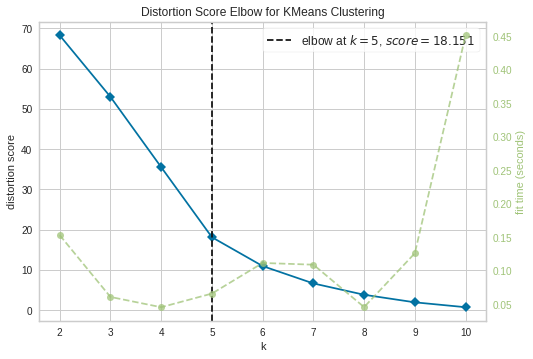

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans())
model.fit(df_normalized)
model.show()

Text(0, 0.5, 'SSE')

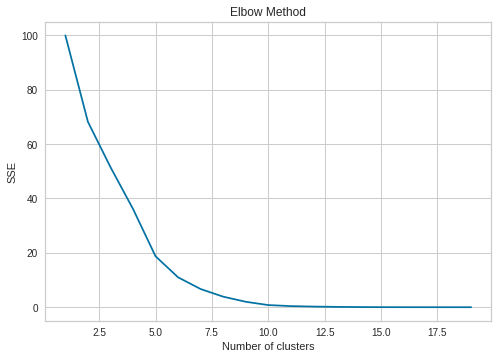

In [ ]:
max_k = 20
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [ ]:
# Choose value for k
k = 5

In [ ]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=5)

In [ ]:
cluster_predictions = kmeans.predict(df_normalized)
df63['cluster_id'] = cluster_predictions
df63

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,4076.1,3087.5,6567.2,10321.9,15056.2,39108.9,0
1,กระทรวงกลาโหม,92346.6,24777.8,15433.6,5162.5,95632.9,233353.4,2
2,กระทรวงการคลัง,13093.2,6734.3,3108.5,873.7,225866.3,249676.0,3
3,กระทรวงการต่างประเทศ,2754.0,2558.6,468.3,1483.9,1662.8,8927.6,0
4,กระทรวงการท่องเที่ยวและกีฬา,1552.5,1068.9,1315.9,740.8,1393.2,6071.3,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2745.1,2812.2,645.1,14924.3,154.9,21281.6,0
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัย และนวัตกรรม,11700.1,1012.7,9091.6,104146.9,1944.2,127895.5,0
7,กระทรวงเกษตรเเละสหกรณ์,24706.3,13751.9,67815.5,2700.8,859.2,109833.7,1
8,กระทรวงคมนาคม,9684.5,2500.4,165887.2,59.1,708.9,178840.1,1
9,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1273.4,1517.0,1385.6,1927.9,794.0,6897.9,0


กระทรวงศึกษาธิการ cluster_id = 2   
สำนักนายกรัฐมนตรี cluster_id = 0

In [ ]:
df63.cluster_id.value_counts()

0    13
2     3
1     2
3     1
4     1
Name: cluster_id, dtype: int64

In [ ]:
# The best value is 1 and the worst value is -1

print(metrics.silhouette_score(df,kmeans.labels_))

0.5089320697321853


In [ ]:
# The minimum score is zero, with lower values indicating better clustering.

print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.6114812248937296


In [ ]:
df63[df63.cluster_id == 0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,4076.1,3087.5,6567.2,10321.9,15056.2,39108.9,0
3,กระทรวงการต่างประเทศ,2754.0,2558.6,468.3,1483.9,1662.8,8927.6,0
4,กระทรวงการท่องเที่ยวและกีฬา,1552.5,1068.9,1315.9,740.8,1393.2,6071.3,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2745.1,2812.2,645.1,14924.3,154.9,21281.6,0
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัย และนวัตกรรม,11700.1,1012.7,9091.6,104146.9,1944.2,127895.5,0
9,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1273.4,1517.0,1385.6,1927.9,794.0,6897.9,0
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11012.2,5924.0,10285.0,1216.6,1932.2,30370.0,0
11,กระทรวงพลังงาน,808.6,536.7,489.1,31.2,292.4,2158.0,0
12,กระทรวงพาณิชย์,2249.4,1636.9,792.3,529.6,2344.9,7553.1,0
14,กระทรวงยุติธรรม,10254.9,9090.7,4336.6,1112.4,2154.5,26949.1,0


In [ ]:
df63[df63.cluster_id == 1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
7,กระทรวงเกษตรเเละสหกรณ์,24706.3,13751.9,67815.5,2700.8,859.2,109833.7,1
8,กระทรวงคมนาคม,9684.5,2500.4,165887.2,59.1,708.9,178840.1,1


In [ ]:
df63[df63.cluster_id == 2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
1,กระทรวงกลาโหม,92346.6,24777.8,15433.6,5162.5,95632.9,233353.4,2
17,กระทรวงศึกษาธิการ,230196.3,19847.4,22527.3,89316.7,6772.6,368660.3,2
18,กระทรวงสาธารณสุข,99248.1,14860.6,17465.5,6945.7,209.9,138729.8,2


In [ ]:
df63[df63.cluster_id == 3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
2,กระทรวงการคลัง,13093.2,6734.3,3108.5,873.7,225866.3,249676.0,3


In [ ]:
df63[df63.cluster_id == 4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
13,กระทรวงมหาดไทย,19158.1,13538.0,34694.8,256160.3,29456.2,353007.4,4


In [ ]:
df = df63[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น', 'cluster_id']]
df.groupby('cluster_id').mean()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
cluster_id,,,,,
0,4312.861538,2523.992308,3007.853846,14809.292308,2424.838462
1,17195.400000,8126.150000,116851.350000,1379.950000,784.050000
2,140597.000000,19828.600000,18475.466667,33808.300000,34205.133333
3,13093.200000,6734.300000,3108.500000,873.700000,225866.300000
4,19158.100000,13538.000000,34694.800000,256160.300000,29456.200000


#### K-mean: Year64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
df64 = pd.read_csv("assignment2_clustering_data.xlsx - 2564.csv")
df64

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7


In [ ]:
df = df64[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น']]
df.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,3671.6,1375.7,375.7,63712.9,584.4
16,2321.9,1430.5,2325.4,1070.7,814.4
17,223199.6,20029.5,19437.0,88628.9,5154.7
18,107548.0,14411.4,17025.5,6637.5,179.9
19,1635.9,603.4,745.8,157.9,1516.2


In [ ]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


In [ ]:
# !pip install yellowbrick

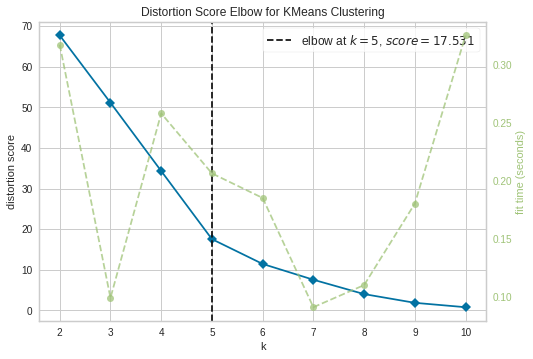

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans())
model.fit(df_normalized)
model.show()

Text(0, 0.5, 'SSE')

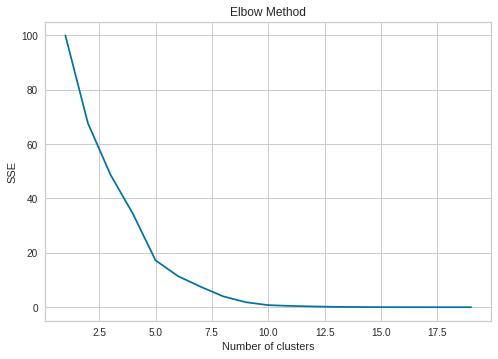

In [ ]:
max_k = 20
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [ ]:
# Choose value for k
k = 5

In [ ]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=5)

In [ ]:
cluster_predictions = kmeans.predict(df_normalized)
df64['cluster_id'] = cluster_predictions
df64

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9,0
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6,1
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2,3
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4,0
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8,0
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0,0
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1,2
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7,2
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7,0


กระทรวงศึกษาธิการ cluster_id = 1   
สำนักนายกรัฐมนตรี cluster_id = 0

In [ ]:
df64.cluster_id.value_counts()

0    13
1     3
2     2
3     1
4     1
Name: cluster_id, dtype: int64

In [ ]:
# The best value is 1 and the worst value is -1

print(metrics.silhouette_score(df,kmeans.labels_))

0.5172476961193615


In [ ]:
# The minimum score is zero, with lower values indicating better clustering.

print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.5723699449851507


In [ ]:
df64[df64.cluster_id == 0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9,0
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4,0
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8,0
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0,0
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7,0
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10992.6,5199.8,10408.8,1103.6,1630.9,29335.7,0
11,กระทรวงพลังงาน,822.0,531.2,707.8,30.7,187.5,2279.2,0
12,กระทรวงพาณิชย์,2216.4,1585.4,845.4,479.5,1698.8,6825.5,0
14,กระทรวงยุติธรรม,10363.6,8775.0,3333.1,1937.6,2418.8,26828.1,0


In [ ]:
df64[df64.cluster_id == 1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6,1
17,กระทรวงศึกษาธิการ,223199.6,20029.5,19437.0,88628.9,5154.7,356449.7,1
18,กระทรวงสาธารณสุข,107548.0,14411.4,17025.5,6637.5,179.9,145802.3,1


In [ ]:
df64[df64.cluster_id == 2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1,2
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7,2


In [ ]:
df64[df64.cluster_id == 3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2,3


In [ ]:
df64[df64.cluster_id == 4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,cluster_id
13,กระทรวงมหาดไทย,19360.2,12718.1,38441.4,235503.6,28464.4,334487.7,4


In [ ]:
df = df64[['งบบุคลากร', 'งบดําเนินงาน', 'งบลงทุน','งบเงินอุดหนุน', 'งบรายจ่ายอื่น', 'cluster_id']]
df.groupby('cluster_id').mean()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
cluster_id,,,,,
0,4285.000000,2419.238462,2954.292308,15838.707692,2189.023077
1,140591.666667,19514.600000,16962.866667,33353.600000,28504.800000
2,17040.650000,6966.000000,124650.950000,1029.100000,658.200000
3,12988.200000,6567.900000,3421.200000,599.400000,244863.500000
4,19360.200000,12718.100000,38441.400000,235503.600000,28464.400000


## Regression Part

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df_budget = pd.read_csv("assignment2_regression_govt_spending.xlsx - budget.csv")
df_budget

,ปี,งบกลาง,สำนักนายกรัฐมนตรี,กระทรวงกลาโหม,กระทรวงการคลัง,กระทรวงการต่างประเทศ,กระทรวงการท่องเที่ยวและกีฬา,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,กระทรวงเกษตรเเละสหกรณ์,กระทรวงคมนาคม,...,กระทรวงพลังงาน,กระทรวงพาณิชย์,กระทรวงมหาดไทย,กระทรวงยุติธรรม,กระทรวงเเรงงาน,กระทรวงวัฒนธรรม,กระทรวงวิทยาศาสตร์และเทคโนโลยี,กระทรวงศึกษาธิการ,กระทรวงสาธารณสุข,กระทรวงอุตสาหกรรม
0,2547,130325.6982,7437.5239,78551.3245,131532.3509,5401.1813,2572.6008,4026.5131,53084.8043,51642.2188,...,1555.1703,4620.8538,102793.9181,11305.3150,12958.5813,2239.6428,5130.5591,190262.8362,45147.8912,3037.9549
1,2548,200189.9838,9465.8280,81241.3899,140176.6018,5648.4780,2403.0069,4755.3858,52131.1367,66443.3708,...,1609.7556,4658.0021,139800.1791,11753.7794,17679.2534,2480.8597,6671.8609,203752.3867,45014.4048,3697.8785
2,2549,256220.0081,15188.5060,85936.1180,144371.5171,6334.6295,2978.6333,5968.2579,55150.4657,66054.9252,...,1705.8282,4829.7984,160643.4755,12449.7379,18819.2455,2937.3920,9995.3871,225592.2688,52652.2127,3908.4547
3,2550,197650.6613,14395.7081,115024.0148,172907.0925,7321.3340,3413.2816,8632.2180,64972.7696,70546.8483,...,2199.2721,5826.1381,179115.7526,13934.8587,25228.8420,4281.0641,9803.8393,282254.3414,62279.2224,4528.4215
4,2551,242774.5848,13579.6648,143518.9011,180496.5578,7587.3383,3656.9314,9129.7977,65193.2776,65679.7689,...,2465.2720,6152.7260,190930.1453,14451.6034,26162.5259,4371.0958,8349.9708,301085.1582,65434.7853,5080.9628
5,2552,240940.6369,25577.2833,170157.3938,202380.2991,7825.3361,4439.2462,9698.6278,68822.9613,70693.8866,...,2315.4925,6416.5642,195269.3223,16507.2160,27503.8816,4914.6578,8026.7979,332298.6160,70900.0831,5701.3458
6,2553,215006.8352,22909.8506,154032.4786,215709.6782,6903.8227,4113.1412,9225.8444,54357.8494,54041.5678,...,1869.4813,6251.6728,187998.7071,15168.1590,21540.6284,4347.8166,7159.7011,346713.0933,71625.3595,5601.9450
7,2554,265763.0000,24358.8121,168501.8283,208895.9052,7469.3110,7017.5331,9756.3303,73913.5773,80354.0022,...,2010.4489,6899.2261,230781.2686,16823.7382,28488.5686,5119.5841,8746.7045,391131.8796,86904.5107,6368.3920
8,2555,422211.1000,22123.7000,168667.4000,191415.1000,7579.8000,10264.5000,10201.1000,76721.3000,88852.7000,...,1850.9000,6592.7000,285255.0000,17946.4000,16316.1000,5468.0000,8052.3000,420490.0000,91996.8000,5737.5000
9,2556,319864.0000,25246.8000,180491.5000,180707.9000,7876.0000,11926.0000,10448.8000,72882.9000,95948.7000,...,1956.6000,7430.3000,308835.0000,19407.6000,36525.5000,5957.1000,8830.8000,460411.7000,99788.2000,6341.2000


In [ ]:
df_side = pd.read_csv("assignment2_regression_govt_spending.xlsx - side.csv")
df_side

,ปี,การป้องกันประเทศ,การรักษาความสงบภายใน,การเศรษฐกิจ,การสาธารณสุข,การศาสนา วัฒนธรรม และนันทนาการ,การศึกษา,การสังคมสงเคราะห์
0,2547,74106,65171,282325,83650,6561,251194,108278
1,2548,78053,66727,296571,89164,7109,262722,85976
2,2549,85108,77857,339784,101041,9943,295623,95560
3,2550,114696,87632,332283,148705,13089,355241,112399
4,2551,141266,93033,321880,153825,13614,363164,115086
5,2552,168232,116762,341178,169633,14101,419232,151450
6,2553,154275,111454,246329,178853,13174,402892,135488
7,2554,168319,125306,429339,208093,16535,423563,145362
8,2555,167444,132241,421239,220411,19173,444484,179032
9,2556,177665,144385,470002,254794,21483,493927,201148


### Part1.1

In [ ]:
df = df_budget
df["การศาสนา วัฒนธรรม และนันทนาการ"] = df_side["การศาสนา วัฒนธรรม และนันทนาการ"]
df

,ปี,งบกลาง,สำนักนายกรัฐมนตรี,กระทรวงกลาโหม,กระทรวงการคลัง,กระทรวงการต่างประเทศ,กระทรวงการท่องเที่ยวและกีฬา,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,กระทรวงเกษตรเเละสหกรณ์,กระทรวงคมนาคม,...,กระทรวงพาณิชย์,กระทรวงมหาดไทย,กระทรวงยุติธรรม,กระทรวงเเรงงาน,กระทรวงวัฒนธรรม,กระทรวงวิทยาศาสตร์และเทคโนโลยี,กระทรวงศึกษาธิการ,กระทรวงสาธารณสุข,กระทรวงอุตสาหกรรม,การศาสนา วัฒนธรรม และนันทนาการ
0,2547,130325.6982,7437.5239,78551.3245,131532.3509,5401.1813,2572.6008,4026.5131,53084.8043,51642.2188,...,4620.8538,102793.9181,11305.3150,12958.5813,2239.6428,5130.5591,190262.8362,45147.8912,3037.9549,6561
1,2548,200189.9838,9465.8280,81241.3899,140176.6018,5648.4780,2403.0069,4755.3858,52131.1367,66443.3708,...,4658.0021,139800.1791,11753.7794,17679.2534,2480.8597,6671.8609,203752.3867,45014.4048,3697.8785,7109
2,2549,256220.0081,15188.5060,85936.1180,144371.5171,6334.6295,2978.6333,5968.2579,55150.4657,66054.9252,...,4829.7984,160643.4755,12449.7379,18819.2455,2937.3920,9995.3871,225592.2688,52652.2127,3908.4547,9943
3,2550,197650.6613,14395.7081,115024.0148,172907.0925,7321.3340,3413.2816,8632.2180,64972.7696,70546.8483,...,5826.1381,179115.7526,13934.8587,25228.8420,4281.0641,9803.8393,282254.3414,62279.2224,4528.4215,13089
4,2551,242774.5848,13579.6648,143518.9011,180496.5578,7587.3383,3656.9314,9129.7977,65193.2776,65679.7689,...,6152.7260,190930.1453,14451.6034,26162.5259,4371.0958,8349.9708,301085.1582,65434.7853,5080.9628,13614
5,2552,240940.6369,25577.2833,170157.3938,202380.2991,7825.3361,4439.2462,9698.6278,68822.9613,70693.8866,...,6416.5642,195269.3223,16507.2160,27503.8816,4914.6578,8026.7979,332298.6160,70900.0831,5701.3458,14101
6,2553,215006.8352,22909.8506,154032.4786,215709.6782,6903.8227,4113.1412,9225.8444,54357.8494,54041.5678,...,6251.6728,187998.7071,15168.1590,21540.6284,4347.8166,7159.7011,346713.0933,71625.3595,5601.9450,13174
7,2554,265763.0000,24358.8121,168501.8283,208895.9052,7469.3110,7017.5331,9756.3303,73913.5773,80354.0022,...,6899.2261,230781.2686,16823.7382,28488.5686,5119.5841,8746.7045,391131.8796,86904.5107,6368.3920,16535
8,2555,422211.1000,22123.7000,168667.4000,191415.1000,7579.8000,10264.5000,10201.1000,76721.3000,88852.7000,...,6592.7000,285255.0000,17946.4000,16316.1000,5468.0000,8052.3000,420490.0000,91996.8000,5737.5000,19173
9,2556,319864.0000,25246.8000,180491.5000,180707.9000,7876.0000,11926.0000,10448.8000,72882.9000,95948.7000,...,7430.3000,308835.0000,19407.6000,36525.5000,5957.1000,8830.8000,460411.7000,99788.2000,6341.2000,21483


In [ ]:
df.corr()

,ปี,งบกลาง,สำนักนายกรัฐมนตรี,กระทรวงกลาโหม,กระทรวงการคลัง,กระทรวงการต่างประเทศ,กระทรวงการท่องเที่ยวและกีฬา,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,กระทรวงเกษตรเเละสหกรณ์,กระทรวงคมนาคม,...,กระทรวงพาณิชย์,กระทรวงมหาดไทย,กระทรวงยุติธรรม,กระทรวงเเรงงาน,กระทรวงวัฒนธรรม,กระทรวงวิทยาศาสตร์และเทคโนโลยี,กระทรวงศึกษาธิการ,กระทรวงสาธารณสุข,กระทรวงอุตสาหกรรม,การศาสนา วัฒนธรรม และนันทนาการ
ปี,1.000000,0.936154,0.965369,0.967105,0.864418,0.914703,0.528914,0.852870,0.945579,0.933017,...,0.767464,0.965732,0.992509,0.895836,0.985755,0.464798,0.866009,0.993755,0.616817,0.883614
งบกลาง,0.936154,1.000000,0.882727,0.874026,0.738206,0.834150,0.514666,0.816793,0.921052,0.906701,...,0.658066,0.928371,0.934389,0.796277,0.916089,0.511105,0.770221,0.928177,0.513921,0.823814
สำนักนายกรัฐมนตรี,0.965369,0.882727,1.000000,0.955272,0.865766,0.912655,0.520810,0.786671,0.891393,0.872716,...,0.787786,0.936307,0.961051,0.844932,0.962215,0.390317,0.871568,0.955493,0.670556,0.873556
กระทรวงกลาโหม,0.967105,0.874026,0.955272,1.000000,0.902572,0.943418,0.548478,0.843927,0.904676,0.849982,...,0.814234,0.932659,0.959698,0.853019,0.973618,0.394603,0.888135,0.958786,0.736245,0.896032
กระทรวงการคลัง,0.864418,0.738206,0.865766,0.902572,1.000000,0.869314,0.439274,0.856761,0.817123,0.745976,...,0.777688,0.780553,0.828728,0.794107,0.855092,0.440607,0.721207,0.836232,0.676440,0.763195
กระทรวงการต่างประเทศ,0.914703,0.834150,0.912655,0.943418,0.869314,1.000000,0.564255,0.809644,0.882473,0.812437,...,0.840037,0.918799,0.908929,0.840460,0.945369,0.344419,0.857931,0.907627,0.716703,0.907473
กระทรวงการท่องเที่ยวและกีฬา,0.528914,0.514666,0.520810,0.548478,0.439274,0.564255,1.000000,0.335085,0.386243,0.312414,...,0.843543,0.680779,0.488843,0.259957,0.540867,-0.004016,0.722925,0.539796,0.780566,0.821374
กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,0.852870,0.816793,0.786671,0.843927,0.856761,0.809644,0.335085,1.000000,0.872719,0.807224,...,0.645457,0.750838,0.851002,0.882015,0.839825,0.787604,0.549899,0.819897,0.491381,0.690792
กระทรวงเกษตรเเละสหกรณ์,0.945579,0.921052,0.891393,0.904676,0.817123,0.882473,0.386243,0.872719,1.000000,0.965951,...,0.641571,0.893869,0.957125,0.919457,0.942018,0.539190,0.732312,0.945007,0.447828,0.773964
กระทรวงคมนาคม,0.933017,0.906701,0.872716,0.849982,0.745976,0.812437,0.312414,0.807224,0.965951,1.000000,...,0.555882,0.875716,0.948096,0.930172,0.913511,0.510795,0.708941,0.940347,0.331101,0.715750


In [ ]:
ix = df.corr().sort_values("การศาสนา วัฒนธรรม และนันทนาการ", ascending=False).index
df_sorted = df.corr().loc[:, ix]
df_sorted

,การศาสนา วัฒนธรรม และนันทนาการ,กระทรวงมหาดไทย,กระทรวงศึกษาธิการ,กระทรวงพาณิชย์,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,กระทรวงวัฒนธรรม,กระทรวงการต่างประเทศ,กระทรวงกลาโหม,กระทรวงสาธารณสุข,ปี,...,งบกลาง,กระทรวงการท่องเที่ยวและกีฬา,กระทรวงเกษตรเเละสหกรณ์,กระทรวงการคลัง,กระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร,กระทรวงคมนาคม,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,กระทรวงเเรงงาน,กระทรวงพลังงาน,กระทรวงวิทยาศาสตร์และเทคโนโลยี
ปี,0.883614,0.965732,0.866009,0.767464,0.925732,0.985755,0.914703,0.967105,0.993755,1.000000,...,0.936154,0.528914,0.945579,0.864418,0.628640,0.933017,0.852870,0.895836,0.470146,0.464798
งบกลาง,0.823814,0.928371,0.770221,0.658066,0.857542,0.916089,0.834150,0.874026,0.928177,0.936154,...,1.000000,0.514666,0.921052,0.738206,0.563434,0.906701,0.816793,0.796277,0.371769,0.511105
สำนักนายกรัฐมนตรี,0.873556,0.936307,0.871568,0.787786,0.906324,0.962215,0.912655,0.955272,0.955493,0.965369,...,0.882727,0.520810,0.891393,0.865766,0.614183,0.872716,0.786671,0.844932,0.471529,0.390317
กระทรวงกลาโหม,0.896032,0.932659,0.888135,0.814234,0.903735,0.973618,0.943418,1.000000,0.958786,0.967105,...,0.874026,0.548478,0.904676,0.902572,0.556005,0.849982,0.843927,0.853019,0.598609,0.394603
กระทรวงการคลัง,0.763195,0.780553,0.721207,0.777688,0.717712,0.855092,0.869314,0.902572,0.836232,0.864418,...,0.738206,0.439274,0.817123,1.000000,0.507645,0.745976,0.856761,0.794107,0.635651,0.440607
กระทรวงการต่างประเทศ,0.907473,0.918799,0.857931,0.840037,0.846947,0.945369,1.000000,0.943418,0.907627,0.914703,...,0.834150,0.564255,0.882473,0.869314,0.626870,0.812437,0.809644,0.840460,0.722679,0.344419
กระทรวงการท่องเที่ยวและกีฬา,0.821374,0.680779,0.722925,0.843543,0.687951,0.540867,0.564255,0.548478,0.539796,0.528914,...,0.514666,1.000000,0.386243,0.439274,0.683020,0.312414,0.335085,0.259957,0.123087,-0.004016
กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,0.690792,0.750838,0.549899,0.645457,0.656998,0.839825,0.809644,0.843927,0.819897,0.852870,...,0.816793,0.335085,0.872719,0.856761,0.484763,0.807224,1.000000,0.882015,0.574465,0.787604
กระทรวงเกษตรเเละสหกรณ์,0.773964,0.893869,0.732312,0.641571,0.816991,0.942018,0.882473,0.904676,0.945007,0.945579,...,0.921052,0.386243,1.000000,0.817123,0.507227,0.965951,0.872719,0.919457,0.548476,0.539190
กระทรวงคมนาคม,0.715750,0.875716,0.708941,0.555882,0.830480,0.913511,0.812437,0.849982,0.940347,0.933017,...,0.906701,0.312414,0.965951,0.745976,0.572127,1.000000,0.807224,0.930172,0.422588,0.510795


In [ ]:
df_top5corr = df[['กระทรวงมหาดไทย','กระทรวงศึกษาธิการ','กระทรวงพาณิชย์','กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม','กระทรวงวัฒนธรรม']]
df_top5corr

,กระทรวงมหาดไทย,กระทรวงศึกษาธิการ,กระทรวงพาณิชย์,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,กระทรวงวัฒนธรรม
0,102793.9181,190262.8362,4620.8538,14883.2082,2239.6428
1,139800.1791,203752.3867,4658.0021,16150.1673,2480.8597
2,160643.4755,225592.2688,4829.7984,16237.9477,2937.3920
3,179115.7526,282254.3414,5826.1381,17515.4592,4281.0641
4,190930.1453,301085.1582,6152.7260,18819.2856,4371.0958
5,195269.3223,332298.6160,6416.5642,20603.2571,4914.6578
6,187998.7071,346713.0933,6251.6728,20108.5233,4347.8166
7,230781.2686,391131.8796,6899.2261,22936.7930,5119.5841
8,285255.0000,420490.0000,6592.7000,25585.0000,5468.0000
9,308835.0000,460411.7000,7430.3000,30657.8000,5957.1000


In [ ]:
import statsmodels.api as sm

X = df_top5corr
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df_side["การศาสนา วัฒนธรรม และนันทนาการ"], X)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                  OLS Regression Results                                  
Dep. Variable:     การศาสนา วัฒนธรรม และนันทนาการ   R-squared:                       0.986
Model:                                        OLS   Adj. R-squared:                  0.980
Method:                             Least Squares   F-statistic:                     157.8
Date:                            Fri, 04 Mar 2022   Prob (F-statistic):           7.46e-10
Time:                                    13:57:48   Log-Likelihood:                -133.66
No. Observations:                              17   AIC:                             279.3
Df Residuals:                                  11   BIC:                             284.3
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                                            coef    std err          t      P>|t|      [0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


R-squared: 0.986

null hypothesis(H0) ไม่ขึ้นกับค่านั้น(slope b=0)  
alternative hypothesis(Ha) ขึ้นกับค่านั้น(slope b!=0)  
ถ้า p value < 0.05 reject null
  
นิยม p value 0.1 0.05 0.01

In [ ]:
# ดังนั้น Signif. 0.05
# กระทรวงมหาดไทย reject null
# กระทรวงพาณิชย์ reject null

In [ ]:
df2 = df[['กระทรวงมหาดไทย','กระทรวงพาณิชย์']]
df2

,กระทรวงมหาดไทย,กระทรวงพาณิชย์
0,102793.9181,4620.8538
1,139800.1791,4658.0021
2,160643.4755,4829.7984
3,179115.7526,5826.1381
4,190930.1453,6152.7260
5,195269.3223,6416.5642
6,187998.7071,6251.6728
7,230781.2686,6899.2261
8,285255.0000,6592.7000
9,308835.0000,7430.3000


In [ ]:
import statsmodels.api as sm

X = df2
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df_side["การศาสนา วัฒนธรรม และนันทนาการ"], X)
results = model.fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     การศาสนา วัฒนธรรม และนันทนาการ   R-squared:                       0.980
Model:                                        OLS   Adj. R-squared:                  0.977
Method:                             Least Squares   F-statistic:                     339.2
Date:                            Fri, 04 Mar 2022   Prob (F-statistic):           1.38e-12
Time:                                    13:58:39   Log-Likelihood:                -136.94
No. Observations:                              17   AIC:                             279.9
Df Residuals:                                  14   BIC:                             282.4
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [ ]:
prediction = results.predict(X)
prediction

0      6928.752767
1      8292.981045
2      9405.058564
3     12313.487805
4     13465.984046
5     14217.056257
6     13590.024769
7     16544.508666
8     17729.825943
9     20453.255893
10    25260.592915
11    21119.705677
12    21052.351159
13    20381.022297
14    21213.123572
15    21397.876180
16    22260.392446
dtype: float64

In [ ]:
# importing r2_score module
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(df_side["การศาสนา วัฒนธรรม และนันทนาการ"],prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(df_side["การศาสนา วัฒนธรรม และนันทนาการ"],prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(df_side["การศาสนา วัฒนธรรม และนันทนาการ"],prediction)))

r2 socre is  0.9797810066657162
mean_sqrd_error is== 580936.6006195997
root_mean_squared error of is== 762.191970975554


### Part1.2

In [ ]:
df = df_budget[['กระทรวงการท่องเที่ยวและกีฬา','กระทรวงวัฒนธรรม','กระทรวงศึกษาธิการ','กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์','กระทรวงการต่างประเทศ']]
df

,กระทรวงการท่องเที่ยวและกีฬา,กระทรวงวัฒนธรรม,กระทรวงศึกษาธิการ,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,กระทรวงการต่างประเทศ
0,2572.6008,2239.6428,190262.8362,4026.5131,5401.1813
1,2403.0069,2480.8597,203752.3867,4755.3858,5648.4780
2,2978.6333,2937.3920,225592.2688,5968.2579,6334.6295
3,3413.2816,4281.0641,282254.3414,8632.2180,7321.3340
4,3656.9314,4371.0958,301085.1582,9129.7977,7587.3383
5,4439.2462,4914.6578,332298.6160,9698.6278,7825.3361
6,4113.1412,4347.8166,346713.0933,9225.8444,6903.8227
7,7017.5331,5119.5841,391131.8796,9756.3303,7469.3110
8,10264.5000,5468.0000,420490.0000,10201.1000,7579.8000
9,11926.0000,5957.1000,460411.7000,10448.8000,7876.0000


In [ ]:
import statsmodels.api as sm

X = df
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df_side["การศาสนา วัฒนธรรม และนันทนาการ"], X)
results = model.fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     การศาสนา วัฒนธรรม และนันทนาการ   R-squared:                       0.990
Model:                                        OLS   Adj. R-squared:                  0.985
Method:                             Least Squares   F-statistic:                     216.2
Date:                            Fri, 04 Mar 2022   Prob (F-statistic):           1.35e-10
Time:                                    13:59:20   Log-Likelihood:                -131.02
No. Observations:                              17   AIC:                             274.0
Df Residuals:                                  11   BIC:                             279.0
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                                                 coef    std err          t      P>|t|    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


R-squared: 0.986

null hypothesis(H0) ไม่ขึ้นกับค่านั้น(slope b=0)  
alternative hypothesis(Ha) ขึ้นกับค่านั้น(slope b!=0)  
ถ้า p value < 0.05 reject null
  
นิยม p value 0.1 0.05 0.01

In [ ]:
# ดังนั้น Signif. 0.1
# กระทรวงการท่องเที่ยวและกีฬา reject null
# กระทรวงวัฒนธรรม reject null
# กระทรวงการต่างประเทศ reject null

In [ ]:
df2 = df[['กระทรวงการท่องเที่ยวและกีฬา','กระทรวงวัฒนธรรม','กระทรวงการต่างประเทศ']]
df2

,กระทรวงการท่องเที่ยวและกีฬา,กระทรวงวัฒนธรรม,กระทรวงการต่างประเทศ
0,2572.6008,2239.6428,5401.1813
1,2403.0069,2480.8597,5648.4780
2,2978.6333,2937.3920,6334.6295
3,3413.2816,4281.0641,7321.3340
4,3656.9314,4371.0958,7587.3383
5,4439.2462,4914.6578,7825.3361
6,4113.1412,4347.8166,6903.8227
7,7017.5331,5119.5841,7469.3110
8,10264.5000,5468.0000,7579.8000
9,11926.0000,5957.1000,7876.0000


In [ ]:
import statsmodels.api as sm

X = df2
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df_side["การศาสนา วัฒนธรรม และนันทนาการ"], X)
results = model.fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     การศาสนา วัฒนธรรม และนันทนาการ   R-squared:                       0.987
Model:                                        OLS   Adj. R-squared:                  0.984
Method:                             Least Squares   F-statistic:                     327.6
Date:                            Fri, 04 Mar 2022   Prob (F-statistic):           1.71e-12
Time:                                    13:59:34   Log-Likelihood:                -133.22
No. Observations:                              17   AIC:                             274.4
Df Residuals:                                  13   BIC:                             277.8
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [ ]:
prediction = results.predict(X)
prediction

0      7262.693295
1      7701.980534
2      9443.475395
3     12520.634818
4     13101.132554
5     14634.350922
6     12692.574743
7     16468.828126
8     19485.886013
9     21677.513269
10    24740.362048
11    20767.211003
12    20460.129918
13    20300.524344
14    21318.221131
15    21381.759807
16    21668.722081
dtype: float64

In [ ]:
# importing r2_score module
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(df_side["การศาสนา วัฒนธรรม และนันทนาการ"],prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(df_side["การศาสนา วัฒนธรรม และนันทนาการ"],prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(df_side["การศาสนา วัฒนธรรม และนันทนาการ"],prediction)))

r2 socre is  0.9869460246245345
mean_sqrd_error is== 375069.71557956183
root_mean_squared error of is== 612.4293555827985


### Part2: กระทรวงศึกษาธิการ

In [ ]:
df = df_side
df["กระทรวงศึกษาธิการ"] = df_budget["กระทรวงศึกษาธิการ"]
df

,ปี,การป้องกันประเทศ,การรักษาความสงบภายใน,การเศรษฐกิจ,การสาธารณสุข,การศาสนา วัฒนธรรม และนันทนาการ,การศึกษา,การสังคมสงเคราะห์,กระทรวงศึกษาธิการ
0,2547,74106,65171,282325,83650,6561,251194,108278,190262.8362
1,2548,78053,66727,296571,89164,7109,262722,85976,203752.3867
2,2549,85108,77857,339784,101041,9943,295623,95560,225592.2688
3,2550,114696,87632,332283,148705,13089,355241,112399,282254.3414
4,2551,141266,93033,321880,153825,13614,363164,115086,301085.1582
5,2552,168232,116762,341178,169633,14101,419232,151450,332298.6160
6,2553,154275,111454,246329,178853,13174,402892,135488,346713.0933
7,2554,168319,125306,429339,208093,16535,423563,145362,391131.8796
8,2555,167444,132241,421239,220411,19173,444484,179032,420490.0000
9,2556,177665,144385,470002,254794,21483,493927,201148,460411.7000


In [ ]:
ix = df.corr().sort_values("กระทรวงศึกษาธิการ", ascending=False).index
df_sorted = df.corr().loc[:, ix]
df_sorted

,กระทรวงศึกษาธิการ,การศึกษา,การศาสนา วัฒนธรรม และนันทนาการ,การสาธารณสุข,การป้องกันประเทศ,การรักษาความสงบภายใน,ปี,การเศรษฐกิจ,การสังคมสงเคราะห์
ปี,0.866009,0.919007,0.883614,0.980123,0.964086,0.995657,1.000000,0.943751,0.953363
การป้องกันประเทศ,0.893821,0.950833,0.899601,0.973354,1.000000,0.972224,0.964086,0.862016,0.879568
การรักษาความสงบภายใน,0.875281,0.931177,0.890448,0.981021,0.972224,1.000000,0.995657,0.942879,0.949667
การเศรษฐกิจ,0.783286,0.834743,0.837611,0.909736,0.862016,0.942879,0.943751,1.000000,0.943968
การสาธารณสุข,0.936495,0.965081,0.935280,1.000000,0.973354,0.981021,0.980123,0.909736,0.892718
การศาสนา วัฒนธรรม และนันทนาการ,0.940386,0.966511,1.000000,0.935280,0.899601,0.890448,0.883614,0.837611,0.746810
การศึกษา,0.973864,1.000000,0.966511,0.965081,0.950833,0.931177,0.919007,0.834743,0.781584
การสังคมสงเคราะห์,0.703469,0.781584,0.746810,0.892718,0.879568,0.949667,0.953363,0.943968,1.000000
กระทรวงศึกษาธิการ,1.000000,0.973864,0.940386,0.936495,0.893821,0.875281,0.866009,0.783286,0.703469


In [ ]:
import statsmodels.api as sm

X = df_budget["กระทรวงศึกษาธิการ"]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df_selected["การศึกษา"], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               การศึกษา   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     275.8
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           4.58e-11
Time:                        14:09:51   Log-Likelihood:                -193.92
No. Observations:                  17   AIC:                             391.8
Df Residuals:                      15   BIC:                             393.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
กระทรวงศึกษาธิการ     0.8437      0.05

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


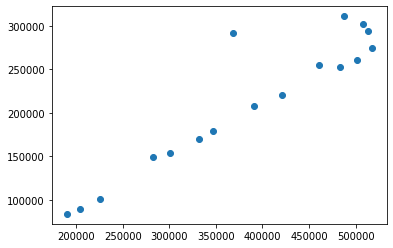

In [ ]:
plt.plot(df_budget["กระทรวงศึกษาธิการ"], df_side["การสาธารณสุข"], "o")

In [ ]:
X = df_budget[["กระทรวงศึกษาธิการ", "กระทรวงสาธารณสุข"]]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df_side["การสาธารณสุข"], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           การสาธารณสุข   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     556.4
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           4.57e-14
Time:                        10:35:45   Log-Likelihood:                -177.63
No. Observations:                  17   AIC:                             361.3
Df Residuals:                      14   BIC:                             363.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
กระทรวงศึกษาธิการ     0.2078      0.04

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


#### using train test split

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
df_side

,ปี,การป้องกันประเทศ,การรักษาความสงบภายใน,การเศรษฐกิจ,การสาธารณสุข,การศาสนา วัฒนธรรม และนันทนาการ,การศึกษา,การสังคมสงเคราะห์
0,2547,74106,65171,282325,83650,6561,251194,108278
1,2548,78053,66727,296571,89164,7109,262722,85976
2,2549,85108,77857,339784,101041,9943,295623,95560
3,2550,114696,87632,332283,148705,13089,355241,112399
4,2551,141266,93033,321880,153825,13614,363164,115086
5,2552,168232,116762,341178,169633,14101,419232,151450
6,2553,154275,111454,246329,178853,13174,402892,135488
7,2554,168319,125306,429339,208093,16535,423563,145362
8,2555,167444,132241,421239,220411,19173,444484,179032
9,2556,177665,144385,470002,254794,21483,493927,201148


In [ ]:
X = df_budget["กระทรวงศึกษาธิการ"]
Y = df_side.drop(columns=['ปี'])

for col in Y.columns:
  print(col)
  scores = []
  for i in range(1,11):
    x_train, x_test, y_train, y_test = train_test_split(X, df_side[col], test_size=0.2)
    model = LinearRegression()
    model.fit(x_train.values.reshape(-1, 1), y_train)
    y_pred = model.predict(x_test.values.reshape(-1, 1))
    print(f"r2_score round{i}: {r2_score(y_test, y_pred)}")
    scores.append(r2_score(y_test, y_pred))
  print(f"Avg r2_score: {sum(scores)/len(scores)}")

การป้องกันประเทศ
r2_score round1: 0.9029520227507707
r2_score round2: 0.20041461612551337
r2_score round3: 0.9080695996477743
r2_score round4: 0.08950820869084519
r2_score round5: 0.8918636709500172
r2_score round6: 0.5877133003959973
r2_score round7: 0.9433205732380772
r2_score round8: -6.40756722536356
r2_score round9: 0.789427330351752
r2_score round10: 0.7614377643312862
Avg r2_score: -0.033286013888152687
การรักษาความสงบภายใน
r2_score round1: 0.36907622508586746
r2_score round2: 0.38167589798973933
r2_score round3: 0.5247853346708278
r2_score round4: -0.18013998294197564
r2_score round5: -0.9546553614827415
r2_score round6: 0.9698303720376452
r2_score round7: -0.8277874303045172
r2_score round8: 0.7802279907053775
r2_score round9: 0.9324133349494027
r2_score round10: 0.4699491385238235
Avg r2_score: 0.2465375519233449
การเศรษฐกิจ
r2_score round1: 0.06338157024115232
r2_score round2: -1.0583077666586722
r2_score round3: 0.9018490528370994
r2_score round4: 0.6748645310669101
r2_scor

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#define predictor and response variables
X = df_budget["กระทรวงศึกษาธิการ"]
y = df_side.drop(columns=['ปี'])

for col in Y.columns:
  print(col)
  #define cross-validation method to use
  cv = KFold(n_splits=5, random_state=1, shuffle=True)

  #build multiple linear regression model
  model = LinearRegression()

  #use k-fold CV to evaluate model
  scores = cross_val_score(model, X.values.reshape(-1, 1), df_side[col], scoring='r2', cv=cv)

  print(sum(scores)/5)


การป้องกันประเทศ
0.3915177784080342
การรักษาความสงบภายใน
0.6883034751682515
การเศรษฐกิจ
0.47955221659093467
การสาธารณสุข
0.7785756408714816
การศาสนา วัฒนธรรม และนันทนาการ
0.5979576281166488
การศึกษา
0.8754335266167674
การสังคมสงเคราะห์
0.19330329607462307


### Part3
**input**: กระทรวงมหาดไทย กระทรวงพาณิชย์ กระทรวงการท่องเที่ยวและกีฬา กระทรวงวัฒนธรรม กระทรวงการต่างประเทศ  
**output**: ด้านการศาสนา วัฒนธรรมและนันนทาการ

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#### Linear

In [ ]:
import numpy as np

X = df_budget[["กระทรวงมหาดไทย","กระทรวงพาณิชย์","กระทรวงการท่องเที่ยวและกีฬา", "กระทรวงวัฒนธรรม", "กระทรวงการต่างประเทศ"]]
y = df_side["การศาสนา วัฒนธรรม และนันทนาการ"]

r2_list = []
mse_list = []
rmse_list = []
mad_list = []
mape_list = []

for i in range(1,11):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    r2_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    rmse_list.append(mean_squared_error(y_test, y_pred, squared=False))
    mad_list.append(mean_absolute_error(y_test, y_pred))
    mape_list.append(mean_absolute_percentage_error(y_test, y_pred))

    print(f"----- Round {i} -----")
    print("r2:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
    print("MAD:", mean_absolute_error(y_test, y_pred))
    print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print(f"----- AVG -----")
print("avg r2:", sum(r2_list)/len(r2_list))
print("avg MSE:", sum(mse_list)/len(mse_list))
print("avg RMSE:", sum(rmse_list)/len(rmse_list))
print("avg MAD:", sum(mad_list)/len(mad_list))
print("avg MAPE:", sum(mape_list)/len(mape_list))

----- Round 1 -----
r2: 0.9732651618516714
MSE: 791290.5872023883
RMSE: 889.5451574835245
MAD: 801.66507594012
MAPE: 0.05318717324027055
----- Round 2 -----
r2: 0.9501366716869039
MSE: 1552567.8502141275
RMSE: 1246.0208064932654
MAD: 1110.915997560811
MAPE: 0.07605729731339361
----- Round 3 -----
r2: 0.8995594634069607
MSE: 1152174.7137626458
RMSE: 1073.394016082932
MAD: 826.9355102580909
MAPE: 0.04637438870385827
----- Round 4 -----
r2: 0.9705223117526024
MSE: 1160493.2385406534
RMSE: 1077.2619173351732
MAD: 919.7709462304553
MAPE: 0.09712658854960414
----- Round 5 -----
r2: 0.9349489986884602
MSE: 799408.9958708739
RMSE: 894.0967486077074
MAD: 724.9423760461008
MAPE: 0.039475774294093546
----- Round 6 -----
r2: 0.866733331090988
MSE: 1751637.5355545387
RMSE: 1323.4944410742867
MAD: 1222.292119851797
MAPE: 0.09024297737089992
----- Round 7 -----
r2: 0.9859490710502169
MSE: 476446.40866046475
RMSE: 690.2509751246026
MAD: 607.3945191712628
MAPE: 0.04807872024985175
----- Round 8 -----
r

#### Logarithm

In [ ]:
import numpy as np

X = np.log(df_budget[["กระทรวงมหาดไทย","กระทรวงพาณิชย์","กระทรวงการท่องเที่ยวและกีฬา", "กระทรวงวัฒนธรรม", "กระทรวงการต่างประเทศ"]])
y = df_side["การศาสนา วัฒนธรรม และนันทนาการ"]

r2_list = []
mse_list = []
rmse_list = []
mad_list = []
mape_list = []

for i in range(1,11):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    r2_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    rmse_list.append(mean_squared_error(y_test, y_pred, squared=False))
    mad_list.append(mean_absolute_error(y_test, y_pred))
    mape_list.append(mean_absolute_percentage_error(y_test, y_pred))

    print(f"----- Round {i} -----")
    print("r2:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
    print("MAD:", mean_absolute_error(y_test, y_pred))
    print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print(f"----- AVG -----")
print("avg r2:", sum(r2_list)/len(r2_list))
print("avg MSE:", sum(mse_list)/len(mse_list))
print("avg RMSE:", sum(rmse_list)/len(rmse_list))
print("avg MAD:", sum(mad_list)/len(mad_list))
print("avg MAPE:", sum(mape_list)/len(mape_list))

----- Round 1 -----
r2: 0.9668430398029327
MSE: 1015819.4740588226
RMSE: 1007.878700071999
MAD: 799.9295899473121
MAPE: 0.06915876113239437
----- Round 2 -----
r2: 0.9671589801100731
MSE: 395208.1290979542
RMSE: 628.6558113132768
MAD: 563.6120968694498
MAPE: 0.033242744751001425
----- Round 3 -----
r2: 0.9446442779439259
MSE: 1297677.1355137324
RMSE: 1139.1563261965991
MAD: 848.6735085974166
MAPE: 0.09058593983101075
----- Round 4 -----
r2: 0.9027557641491714
MSE: 1208859.6408878888
RMSE: 1099.4815327634606
MAD: 732.5025380032215
MAPE: 0.03624889707234933
----- Round 5 -----
r2: 0.9605291120155133
MSE: 1508476.6836170692
RMSE: 1228.2005876961096
MAD: 1135.8828075222748
MAPE: 0.08443580893883347
----- Round 6 -----
r2: 0.9321078174433048
MSE: 790789.7662696391
RMSE: 889.2636089875932
MAD: 807.3810653187053
MAPE: 0.04409156501815417
----- Round 7 -----
r2: 0.9478007031546449
MSE: 1814444.3988371037
RMSE: 1347.0131398160538
MAD: 1129.4953990318656
MAPE: 0.1285253415452903
----- Round 8 --

#### Exponential

In [ ]:
X = df_budget[["กระทรวงมหาดไทย","กระทรวงพาณิชย์","กระทรวงการท่องเที่ยวและกีฬา", "กระทรวงวัฒนธรรม", "กระทรวงการต่างประเทศ"]]
y = np.log(df_side["การศาสนา วัฒนธรรม และนันทนาการ"])

r2_list = []
mse_list = []
rmse_list = []
mad_list = []
mape_list = []

for i in range(1,11):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    y_test = np.e**y_test
    y_pred = np.e**y_pred

    r2_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    rmse_list.append(mean_squared_error(y_test, y_pred, squared=False))
    mad_list.append(mean_absolute_error(y_test, y_pred))
    mape_list.append(mean_absolute_percentage_error(y_test, y_pred))

    print(f"----- Round {i} -----")
    print("r2:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
    print("MAD:", mean_absolute_error(y_test, y_pred))
    print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print(f"----- AVG -----")
print("avg r2:", sum(r2_list)/len(r2_list))
print("avg MSE:", sum(mse_list)/len(mse_list))
print("avg RMSE:", sum(rmse_list)/len(rmse_list))
print("avg MAD:", sum(mad_list)/len(mad_list))
print("avg MAPE:", sum(mape_list)/len(mape_list))

----- Round 1 -----
r2: 0.8793117660199297
MSE: 3353413.6370563414
RMSE: 1831.2328189108946
MAD: 1584.4873776375362
MAPE: 0.11155201923738722
----- Round 2 -----
r2: 0.7897672604408104
MSE: 6343348.526374954
RMSE: 2518.600509484375
MAD: 1898.8579756987365
MAPE: 0.1158854410258282
----- Round 3 -----
r2: 0.4346576696927045
MSE: 12343372.826377809
RMSE: 3513.313653287706
MAD: 2774.130961713161
MAPE: 0.1731202625593875
----- Round 4 -----
r2: 0.7140001236017304
MSE: 7704405.8987444425
RMSE: 2775.6811594173496
MAD: 2136.548455702998
MAPE: 0.1301085537959806
----- Round 5 -----
r2: 0.8303172628613865
MSE: 5170061.621049032
RMSE: 2273.7769505932265
MAD: 1935.0013266551057
MAPE: 0.143488673968278
----- Round 6 -----
r2: 0.8217933970007361
MSE: 3253918.0495322086
RMSE: 1803.8619818412408
MAD: 1507.5707612400645
MAPE: 0.08110760628158302
----- Round 7 -----
r2: -0.7278525675358456
MSE: 31177448.138097007
RMSE: 5583.676937117423
MAD: 3682.287172539249
MAPE: 0.16735018395835036
----- Round 8 ----

#### Power

In [ ]:
import numpy as np

X = np.log(df_budget[["กระทรวงมหาดไทย","กระทรวงพาณิชย์","กระทรวงการท่องเที่ยวและกีฬา", "กระทรวงวัฒนธรรม", "กระทรวงการต่างประเทศ"]])
y = np.log(df_side["การศาสนา วัฒนธรรม และนันทนาการ"])

r2_list = []
mse_list = []
rmse_list = []
mad_list = []
mape_list = []

for i in range(1,11):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    y_test = np.e**y_test
    y_pred = np.e**y_pred

    r2_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    rmse_list.append(mean_squared_error(y_test, y_pred, squared=False))
    mad_list.append(mean_absolute_error(y_test, y_pred))
    mape_list.append(mean_absolute_percentage_error(y_test, y_pred))
    

    print(f"----- Round {i} -----")
    print("r2:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
    print("MAD:", mean_absolute_error(y_test, y_pred))
    print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print(f"----- AVG -----")
print("avg r2:", sum(r2_list)/len(r2_list))
print("avg MSE:", sum(mse_list)/len(mse_list))
print("avg RMSE:", sum(rmse_list)/len(rmse_list))
print("avg MAD:", sum(mad_list)/len(mad_list))
print("avg MAPE:", sum(mape_list)/len(mape_list))

----- Round 1 -----
r2: 0.9747514069254835
MSE: 730864.5937529936
RMSE: 854.906190030809
MAD: 765.3884362299486
MAPE: 0.07175316657062521
----- Round 2 -----
r2: 0.9737399638547087
MSE: 1306281.0732961183
RMSE: 1142.9265388887065
MAD: 1057.881841988192
MAPE: 0.09822108200368511
----- Round 3 -----
r2: 0.9672443407303126
MSE: 566040.9877363555
RMSE: 752.3569549996568
MAD: 633.1132913420985
MAPE: 0.04920737282672232
----- Round 4 -----
r2: 0.9510472918973272
MSE: 1572043.141123126
RMSE: 1253.811445602219
MAD: 1068.0294997474582
MAPE: 0.06894604920767679
----- Round 5 -----
r2: 0.9272541435848425
MSE: 2079455.7762460744
RMSE: 1442.0318222029896
MAD: 1240.8229134942908
MAPE: 0.10052641244513777
----- Round 6 -----
r2: 0.8836544355567932
MSE: 3144138.072109714
RMSE: 1773.1717548251534
MAD: 1606.498640949351
MAPE: 0.09939383812914306
----- Round 7 -----
r2: 0.9331610456720129
MSE: 966797.77332104
RMSE: 983.2587519676802
MAD: 812.539918869927
MAPE: 0.05572203705761722
----- Round 8 -----
r2: 

### Part4
**กระทรวงที่ 3**: วัฒนธรรม

In [ ]:
df = df_budget[["ปี", "กระทรวงวัฒนธรรม"]]
df = df[(df["ปี"] > 2551) & (df["ปี"] < 2562)]
df

,ปี,กระทรวงวัฒนธรรม
5,2552,4914.6578
6,2553,4347.8166
7,2554,5119.5841
8,2555,5468.0000
9,2556,5957.1000
10,2557,6624.7000
11,2558,7047.4000
12,2559,7742.3000
13,2560,7386.9000
14,2561,8102.3000


In [ ]:
df_part4 = pd.read_csv("regression part4 - cleaned.csv")
df_part4

,ปี,จำนวนพระภิกษุ,จำนวนสามเณร,จำนวนวัด,งบสำนักพุทธ
0,2552,267939.0,65937.0,35616.0,3449.27
1,2553,291116.0,70408.0,37100.0,3588.75
2,2554,290331.0,62478.0,37084.0,3788.64
3,2555,293879.0,61416.0,37322.0,4329.51
4,2556,289131.0,60528.0,37734.0,4821.77
5,2557,290015.0,58418.0,39277.0,5362.03
6,2558,298580.0,59587.0,39883.0,5121.30
7,2559,289334.0,58426.0,40772.0,5360.19
8,2560,267848.0,49152.0,41142.0,5054.93
9,2561,281058.0,44430.0,41252.0,5020.29


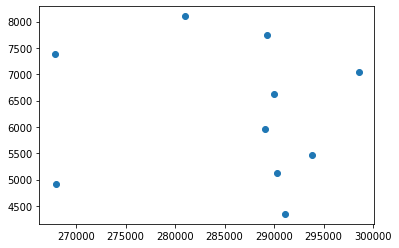

In [ ]:
plt.scatter(y=df["กระทรวงวัฒนธรรม"], x=df_part4['จำนวนพระภิกษุ'])

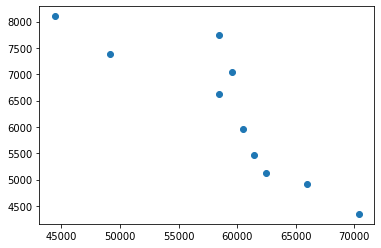

In [ ]:
plt.scatter(y=df["กระทรวงวัฒนธรรม"], x=df_part4['จำนวนสามเณร'])

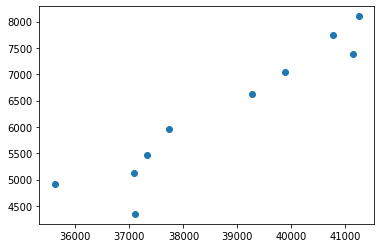

In [ ]:
plt.scatter(y=df["กระทรวงวัฒนธรรม"], x=df_part4['จำนวนวัด'])

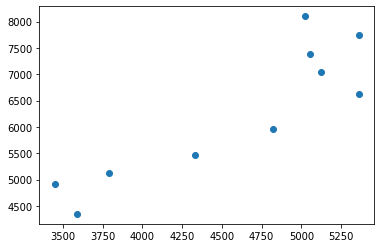

In [ ]:
plt.scatter(y=df["กระทรวงวัฒนธรรม"], x=df_part4['งบสำนักพุทธ'])

In [ ]:
import statsmodels.api as sm

X = df_part4[['จำนวนพระภิกษุ','จำนวนสามเณร', 'จำนวนวัด', 'งบสำนักพุทธ']]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df["กระทรวงวัฒนธรรม"].values.reshape(-1,1), X)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     22.94
Date:                Tue, 08 Mar 2022   Prob (F-statistic):            0.00205
Time:                        13:23:18   Log-Likelihood:                -70.513
No. Observations:                  10   AIC:                             151.0
Df Residuals:                       5   BIC:                             152.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
จำนวนพระภิกษุ    -0.0074      0.016     -0.458

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
X = df_part4[['จำนวนสามเณร', 'จำนวนวัด', 'งบสำนักพุทธ']]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df["กระทรวงวัฒนธรรม"].values.reshape(-1,1), X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     35.15
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           0.000334
Time:                        13:23:40   Log-Likelihood:                -70.718
No. Observations:                  10   AIC:                             149.4
Df Residuals:                       6   BIC:                             150.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
จำนวนสามเณร    -0.0517      0.029     -1.759      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
import numpy as np

X = df_part4[['จำนวนสามเณร', 'จำนวนวัด', 'งบสำนักพุทธ']]
y = df["กระทรวงวัฒนธรรม"]

r2_list = []
mse_list = []
rmse_list = []
mad_list = []
mape_list = []

for i in range(1,6):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    r2_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    rmse_list.append(mean_squared_error(y_test, y_pred, squared=False))
    mad_list.append(mean_absolute_error(y_test, y_pred))
    mape_list.append(mean_absolute_percentage_error(y_test, y_pred))

    print(f"----- Round {i} -----")
    print("r2:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
    print("MAD:", mean_absolute_error(y_test, y_pred))
    print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print(f"----- AVG -----")
print("avg r2:", sum(r2_list)/len(r2_list))
print("avg MSE:", sum(mse_list)/len(mse_list))
print("avg RMSE:", sum(rmse_list)/len(rmse_list))
print("avg MAD:", sum(mad_list)/len(mad_list))
print("avg MAPE:", sum(mape_list)/len(mape_list))

----- Round 1 -----
r2: -0.3918951622590785
MSE: 135305.25956200363
RMSE: 367.8386325034439
MAD: 323.7275345436589
MAPE: 0.04607146317457855
----- Round 2 -----
r2: 0.8436038514533466
MSE: 317766.09788354597
RMSE: 563.7074577150332
MAD: 551.0326682986997
MAPE: 0.08777506617746268
----- Round 3 -----
r2: 0.8620483216853311
MSE: 320122.3052089909
RMSE: 565.7935181751297
MAD: 535.4189459224754
MAPE: 0.09663647348899242
----- Round 4 -----
r2: 0.5276826604247895
MSE: 1012499.0238712133
RMSE: 1006.2301048324947
MAD: 906.5619605250835
MAPE: 0.1330676055980736
----- Round 5 -----
r2: 0.5191086707359571
MSE: 1137458.763955423
RMSE: 1066.5171184539997
MAD: 915.0353858475115
MAPE: 0.17099231825314365
----- AVG -----
avg r2: 0.47210966840806917
avg MSE: 584630.2900962352
avg RMSE: 714.0173663360204
avg MAD: 646.3552990274858
avg MAPE: 0.10690858533845018
